In [470]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
import numpy as np

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [471]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [473]:
df.isnull().sum().sum()

0

In [474]:
df['price']=df['price'].astype(int)
df['bathrooms']=df['bathrooms'].astype(int)
df['floors']=df['floors'].astype(int)

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


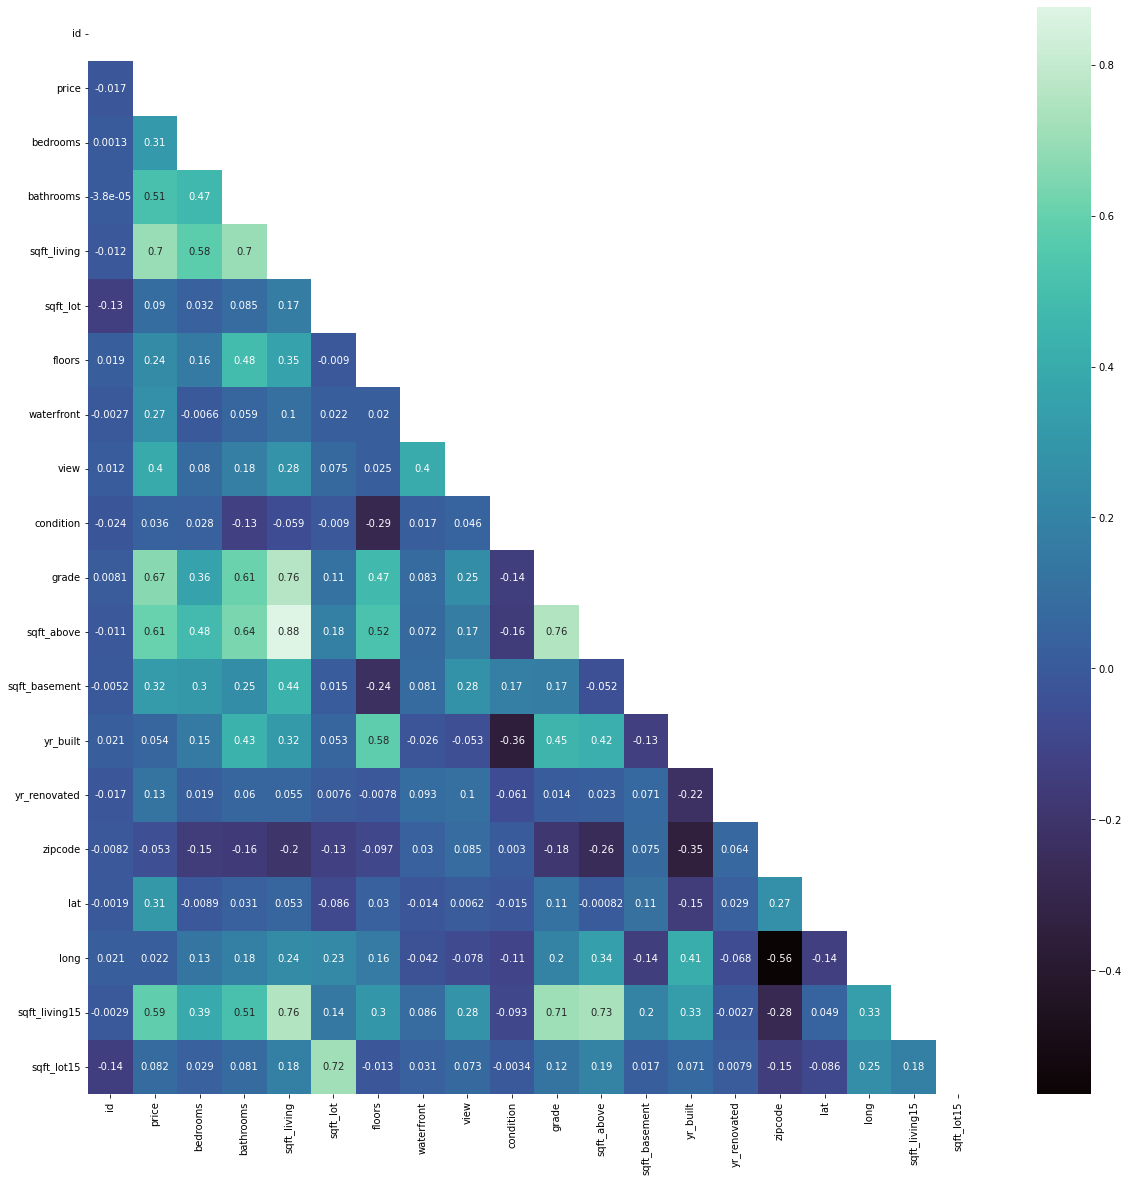

In [475]:
corr= df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap="mako", annot=True, mask=mask)
heatmap = plt.gcf()
heatmap.set_size_inches(20,20)
plt.show()

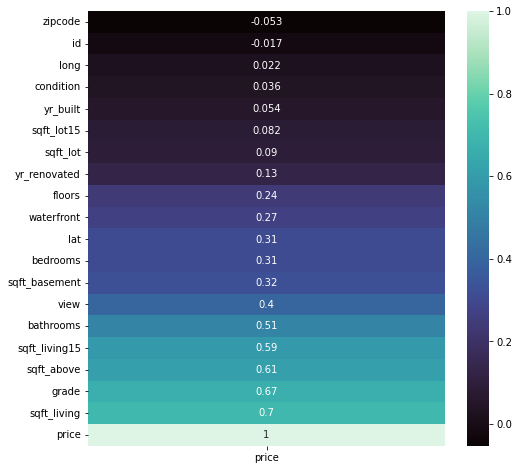

In [476]:
corr= df.corr()[['price']].sort_values(by='price')
sns.heatmap(corr, cmap="mako", annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

# As shown above, the majority of the columns have very weak correlations, thus I will be only using columns with moderate to high correlations

# Visualizing the data

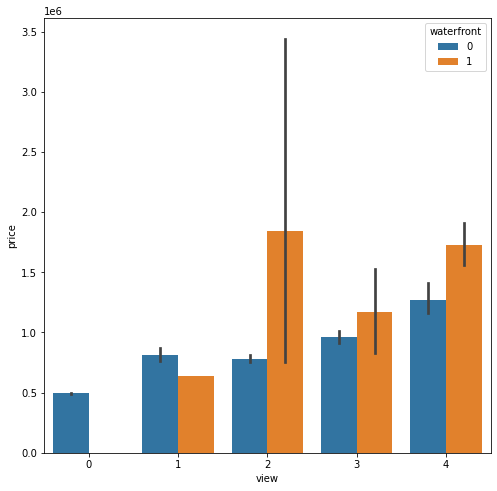

In [477]:
sns.barplot(data=df, x="view", y="price", hue='waterfront')
fig = plt.gcf()
fig.set_size_inches(8,8)

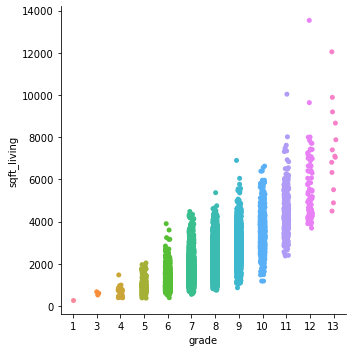

In [478]:
sns.catplot(data=df, x='grade', y='sqft_living')

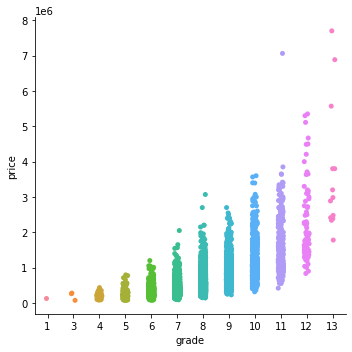

In [479]:
sns.catplot(data=df, x='grade', y='price')

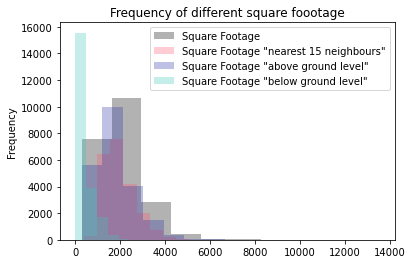

In [480]:
plt.hist(df['sqft_living'],label='Square Footage', alpha= 0.3, color='black')

plt.hist(df['sqft_living15'], label='Square Footage "nearest 15 neighbours"', alpha= 0.3, color='#FF5576')

plt.hist(df['sqft_above'], label='Square Footage "above ground level"', alpha= 0.3, color= '#2933A5')

plt.hist(df['sqft_basement'], label='Square Footage "below ground level"', alpha= 0.3, color='#3FC8BA')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Frequency of different square foootage')
plt.show()

# Splitting the data to 80% training and 20% testing and using the highest correlation  feature ("sqft_living") with the target feature ("price") for the linear regression model

In [481]:
x= df.iloc[:,5:6]
y=df.iloc[:,2:3]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 20)

In [482]:
l_model=LinearRegression()  
l_model.fit(x_train,y_train) 
linearpredicted=l_model.predict(x_test)
out1= metrics.r2_score(y_test,linearpredicted)

# Showing the coefficient, intercept, and the performance of the linear regerssion model

In [483]:
print(f" Coefficient = {l_model.coef_} \n Intercept = {l_model.intercept_} \n MSE = {mean_squared_error(y_test,linearpredicted)} \n R squared = {out1}")

 Coefficient = [[277.95521967]] 
 Intercept = [-40286.1293037] 
 MSE = 71031362556.74606 
 R squared = 0.5094896634542325


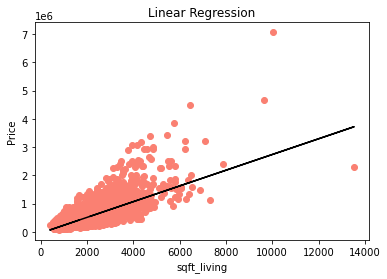

In [484]:
plt.scatter(x_test,y_test,color="salmon")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(np.array(x_test),l_model.predict(x_test),color="k")
plt.show()

In [485]:
upper = df.sqft_living.mean() + 3*df.sqft_living.std()
lower = df.sqft_living.mean() -3*df.sqft_living.std()
new_df= df[(df.sqft_living<upper) & (df.sqft_living>lower)]

x= new_df.iloc[:,5:6]
y=new_df.iloc[:,2:3]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 20)


In [486]:
l_model=LinearRegression()  
l_model.fit(x_train,y_train) 
linearpredicted=l_model.predict(x_test)
r1= metrics.r2_score(y_test,linearpredicted)

In [487]:
print(f" Coefficient = {l_model.coef_} \n Intercept = {l_model.intercept_} \n MSE = {mean_squared_error(y_test,linearpredicted)} \n R squared = {out1}")

 Coefficient = [[248.53521605]] 
 Intercept = [16816.05445165] 
 MSE = 57165883092.48034 
 R squared = 0.5094896634542325


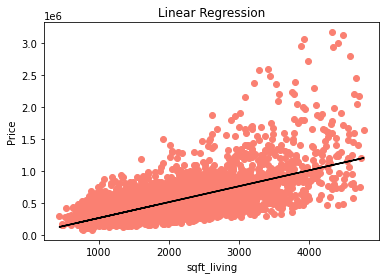

In [488]:
plt.scatter(x_test,y_test,color="salmon")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(np.array(x_test),l_model.predict(x_test),color="k")
plt.show()

# As shown above, I removed the outliers and recalculated the accuracy but it was lower ,therefore I won't be removing the outliers

# Applying multi-linear regression using highest five features and testing its performance

In [489]:
x= df[['sqft_living', 'sqft_above','grade', 'sqft_living15', 'bathrooms']]
y=df.iloc[:,2:3]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 5)

In [490]:
ml_model=LinearRegression()  
ml_model.fit(x_train,y_train) 
linearpredicted=ml_model.predict(x_test)
r2= metrics.r2_score(y_test,linearpredicted)

In [491]:
print(f" Coefficient = {ml_model.coef_} \n Intercept = {ml_model.intercept_} \n MSE = {mean_squared_error(y_test,linearpredicted)} \n R squared = {out1}")

 Coefficient = [[ 2.32317857e+02 -8.32505051e+01  1.05480704e+05  2.40205655e+01
  -2.54118629e+03]] 
 Intercept = [-645312.79129283] 
 MSE = 61161696330.82482 
 R squared = 0.5094896634542325


# Applying polynomial regression with the highest three features and testing its performance


In [492]:
x= df[['sqft_living', 'sqft_above','grade', 'sqft_living15', 'bathrooms']]
y=df.iloc[:,2:3]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 10)

In [493]:
p_model=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_fit = poly.fit_transform(x_train) 
p_model.fit(x_fit, y_train)
x_test_ = poly.fit_transform(x_test)
polypredicted = p_model.predict(x_test_)
r3=metrics.r2_score(y_test,polypredicted)

In [494]:
print(f" Coefficient = {p_model.coef_} \n Intercept = {p_model.intercept_} \n MSE = {mean_squared_error(y_test,polypredicted)} \n R squared = {r3}")

 Coefficient = [[ 0.00000000e+00 -4.02283003e+02  7.87563366e+01 -1.03284581e+05
   3.17432359e+02 -1.03505103e+05 -9.14341060e-02  1.59763481e-01
   7.54875975e+01  6.01237346e-02 -1.27673517e+00 -7.48463320e-02
  -1.51372422e+01 -7.89325489e-02  7.02088079e+00  1.11757885e+04
  -5.45185895e+01  7.64278406e+03  4.72103445e-02 -1.33788106e+01
   1.50039477e+04]] 
 Intercept = [480929.55648111] 
 MSE = 53991815884.440445 
 R squared = 0.6304319171442854


Text(0.5, 1.0, 'Accuracy Comparison')

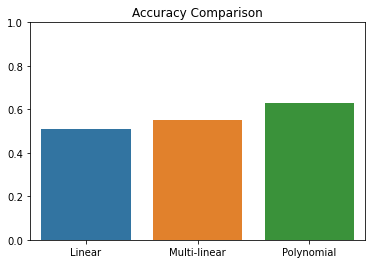

In [495]:
acc=np.array([out1, r2, r3])
acc1=np.array(["Linear", "Multi-linear", "Polynomial"])
sns.barplot(x=acc1,y=acc)
plt.ylim(0, 1)
plt.title("Accuracy Comparison")